In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("FinancialBehavior.csv",
                index_col = 0)
data.shape

/home/luis/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2488193, 42)

In [10]:
data = data.iloc[:1244096, :]
data.shape

(1244096, 42)

In [11]:
data = data.drop(["PROV_CUENTA"], axis = 1)
data = data.drop("PROV_TIPO_DOCUMENTO", axis = 1)
data = data.drop("PROV_NUM_DOCUMENTO",axis = 1)
data = data.drop("PROV_FEC_APER",axis = 1)

In [12]:
data.shape

(1244096, 38)

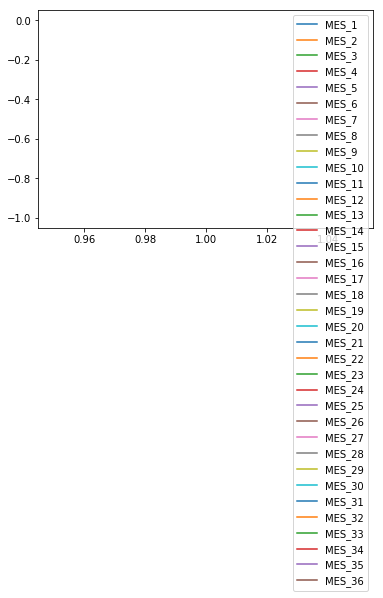

In [13]:
y = data[["ALTURA_MORA", "MORA_MAXIMA"]].copy()
X = data.drop(["ALTURA_MORA", "MORA_MAXIMA"], axis=1)
data = 0

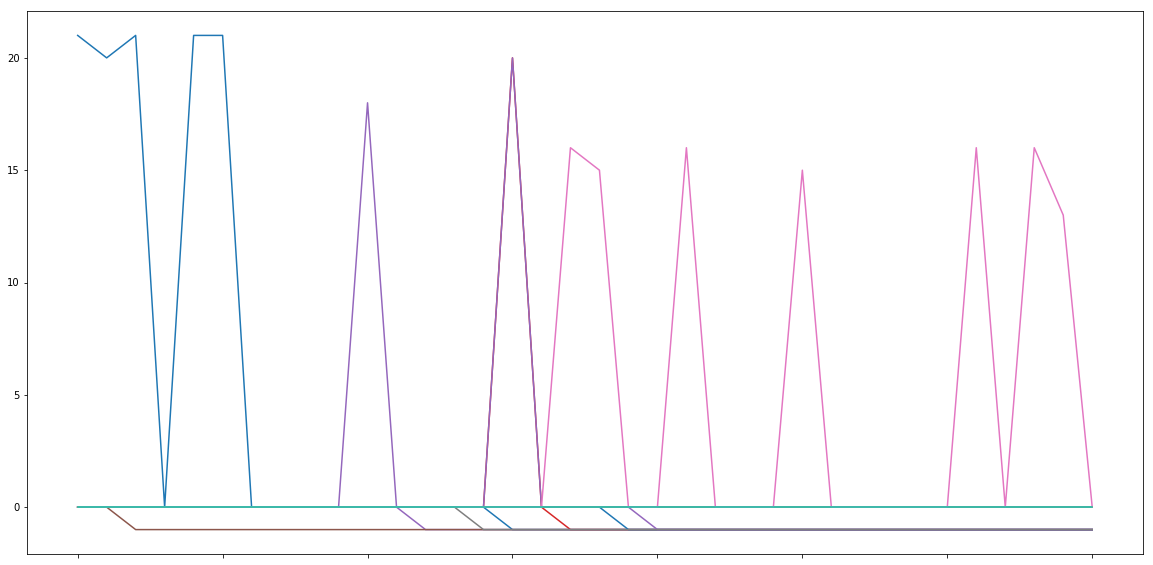

In [98]:
X.iloc[:20,:].T.plot(figsize=(20,10)).get_legend().remove()

In [59]:
y.iloc[3,:]

ALTURA_MORA     0.0
MORA_MAXIMA    20.0
Name: 4, dtype: float64

In [61]:
X.iloc[3,:]

MES_1      0.0
MES_2      0.0
MES_3      0.0
MES_4      0.0
MES_5      0.0
MES_6      0.0
MES_7      0.0
MES_8      0.0
MES_9      0.0
MES_10     0.0
MES_11     0.0
MES_12     0.0
MES_13     0.0
MES_14     0.0
MES_15     0.0
MES_16    20.0
MES_17     0.0
MES_18    -1.0
MES_19    -1.0
MES_20    -1.0
MES_21    -1.0
MES_22    -1.0
MES_23    -1.0
MES_24    -1.0
MES_25    -1.0
MES_26    -1.0
MES_27    -1.0
MES_28    -1.0
MES_29    -1.0
MES_30    -1.0
MES_31    -1.0
MES_32    -1.0
MES_33    -1.0
MES_34    -1.0
MES_35    -1.0
MES_36    -1.0
Name: 4, dtype: float64

In [55]:
y.iloc[1244079,:]

ALTURA_MORA    524.0
MORA_MAXIMA    493.0
Name: 1244080, dtype: float64

In [56]:
X.iloc[1244079,:]

MES_1     493.0
MES_2     462.0
MES_3     432.0
MES_4     401.0
MES_5     371.0
MES_6     340.0
MES_7     309.0
MES_8     279.0
MES_9     248.0
MES_10    218.0
MES_11    187.0
MES_12    159.0
MES_13    128.0
MES_14     97.0
MES_15     67.0
MES_16     36.0
MES_17      6.0
MES_18      0.0
MES_19      5.0
MES_20      6.0
MES_21      0.0
MES_22     -1.0
MES_23     -1.0
MES_24     -1.0
MES_25     -1.0
MES_26     -1.0
MES_27     -1.0
MES_28     -1.0
MES_29     -1.0
MES_30     -1.0
MES_31     -1.0
MES_32     -1.0
MES_33     -1.0
MES_34     -1.0
MES_35     -1.0
MES_36     -1.0
Name: 1244080, dtype: float64

In [65]:
y.iloc[:,1][y.iloc[:,1] > 2000].count()

23590

In [86]:
y.iloc[:,1][(y.iloc[:,1] <= 2000) & (0 < y.iloc[:,1])].count()

491032

In [82]:
y.iloc[:,1][y.iloc[:,1] <= 0].count()

729474

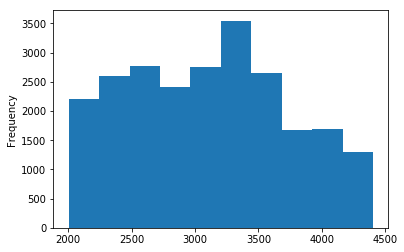

In [93]:
y.iloc[:,1][y.iloc[:,1] > 2000].plot(kind="hist")

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
X = y = 0

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((870867, 36), (870867, 2), (373229, 36), (373229, 2))

In [10]:
from sklearn import tree

In [11]:
clf = tree.DecisionTreeRegressor()

In [12]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [13]:
clf.score(X_test, y_test.iloc[:,:])

0.9980699172762153

In [14]:
X_test.iloc[0]

MES_1     0.0
MES_2     0.0
MES_3     0.0
MES_4     0.0
MES_5     0.0
MES_6     0.0
MES_7     0.0
MES_8     0.0
MES_9     0.0
MES_10    0.0
MES_11    0.0
MES_12    0.0
MES_13    0.0
MES_14    0.0
MES_15    0.0
MES_16    0.0
MES_17    0.0
MES_18    0.0
MES_19    0.0
MES_20    0.0
MES_21    0.0
MES_22    0.0
MES_23    0.0
MES_24    0.0
MES_25    0.0
MES_26    0.0
MES_27    0.0
MES_28    0.0
MES_29    0.0
MES_30    0.0
MES_31    0.0
MES_32    0.0
MES_33    0.0
MES_34    0.0
MES_35    0.0
MES_36    0.0
Name: 965114, dtype: float64

In [15]:
res = clf.predict([X_test.iloc[0]])
res

array([[0.07179724, 0.        ]])

In [16]:
y_test.iloc[0]

ALTURA_MORA    0.0
MORA_MAXIMA    0.0
Name: 965114, dtype: float64

In [17]:
X_test.head()

,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,...,MES_27,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36
965114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1115928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
89355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
y_test

,ALTURA_MORA,MORA_MAXIMA
965114,0.0,0.0
297816,0.0,0.0
1050309,0.0,0.0
1115928,0.0,1.0
89355,0.0,21.0
183653,0.0,0.0
247220,0.0,0.0
589822,0.0,0.0
1182135,0.0,0.0
1058868,0.0,0.0


In [19]:
res = clf.predict([X_test.iloc[-3]])
res

array([[26., 56.]])

In [20]:
y_test.iloc[-3]

ALTURA_MORA     0.0
MORA_MAXIMA    56.0
Name: 1108347, dtype: float64